<a href="https://colab.research.google.com/github/Joseluismed/Tarea1_Solitones_JLMG/blob/main/Tarea1_Solitones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 1 SOLITONES

## Ejercicio 3a) Soluciones estáticas de la teoría de Klein-Gordon para el potencial de sombrero mexicano

<ipython-input-1-17275d6d8da3>:17: RuntimeWarning: overflow encountered in scalar multiply
  dvdx = l*(phi**2-nu**2)*phi  # Derivada de la velocidad con respecto a x
<ipython-input-1-17275d6d8da3>:17: RuntimeWarning: overflow encountered in scalar power
  dvdx = l*(phi**2-nu**2)*phi  # Derivada de la velocidad con respecto a x


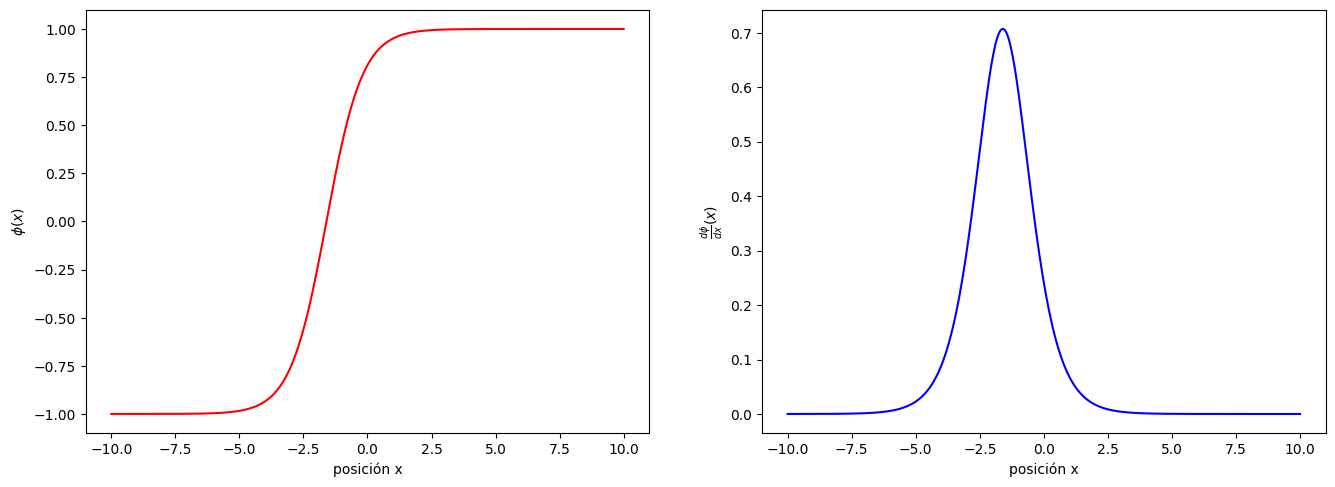

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de KG-MH
l=1
m=1
nu=m**2/l
# Definir la ecuación diferencial a resolver
def SG(phi, y):
    """
    Función que define el sistema de ecuaciones diferenciales de sine-Gordon.
    phi: posición
    y: vector de estado [phi, v]
    """
    phi, v1 = y
    dphidx = v1  # Derivada de phi con respecto a x
    dvdx = l*(phi**2-nu**2)*phi  # Derivada de la velocidad con respecto a x
    return np.array([dphidx, dvdx])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol

# Condiciones en la frontera
phi_a = -nu  # Valor en la frontera en x = a
phi_b = nu  # Valor en la frontera en x = b

# Intervalo y número de puntos
a = -10  # Inicio del intervalo
b = 10   # Fin del intervalo
npt = 500  # Número de puntos

# Método de shooting
def shooting_method(v0_guess):
    y0 = [phi_a, v0_guess]  # Suponer un valor inicial para la derivada
    x, sol = RK4Met(SG, y0, a, b, npt)
    phi_b_guess = sol[-1, 0]  # Valor calculado de phi en x = b
    return phi_b_guess

# Ajustar el valor inicial para cumplir con la condición de frontera
from scipy.optimize import root_scalar

sol = root_scalar(lambda v0: shooting_method(v0) - phi_b, bracket=[-10, 10], method='brentq')
v0_final = sol.root

# Solución final con el valor ajustado de la derivada inicial
y0 = [phi_a, v0_final]
x, sol = RK4Met(SG, y0, a, b, npt)
phi = sol[:, 0]
v1 = sol[:, 1]

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(x, phi, c='red', label=r'$\phi(x)$')
ax[1].plot(x, v1, c='blue', label=r'$\frac{d\phi}{dx}(x)$')
ax[0].set_xlabel('posición x')
ax[1].set_xlabel('posición x')
ax[0].set_ylabel(r'$\phi(x)$')
ax[1].set_ylabel(r'$\frac{d\phi}{dx}(x)$')
plt.show()

Text(0, 0.5, '$\\rho(x)$')

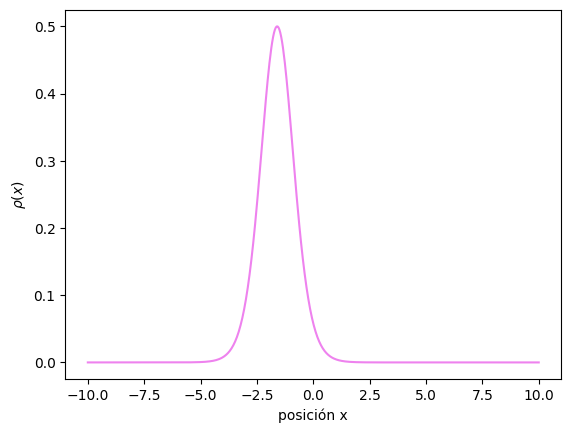

In [2]:
#Graficando densidad de energía de KG-MH
rho=(1/2)*v1**2+(l/4)*(phi**2-nu**2)**2  #Densidad de energía
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x,rho,color='violet')
plt.xlabel('posición x')
plt.ylabel(r'$\rho(x)$')

In [3]:
#Encontrando Energía KG-MH
E=np.trapz(rho,x)
print(E)

0.9428090534272885
